Authored by: *Swaviman Kumar*<br>
*Indraprastha Institute of Information Technology, Delhi* <br>

1. You need to download ‘Stroke Prediction Dataset’ data using the library Scikit learn; ref is given
below. [5]<br>  <br>
2. Divide the data randomly in training and testing with a 7:3 ratio 100 times, perform the following
tasks with training data and test the performance on testing data. Testing data should remain
unseen for all steps.
a. Apply one of the best-known imputation methods to handle the missing/infinite values
and state the significance of the used method if required. [5]<br>
b. Visualize the data in 3-D scatter plot and write the inferences, How the data look like. [5]<br>
c. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier,
again visualize the data in 3-D scatter plot to show the outlier effect and write the
inferences. [5]<br>
d. Normalized the data if required, and write a note for what, why and how you performed
normalization.[5]<br>
e. Balance the data if required; you may increase the sample using upsampling if needed.[5]<br>
f. Perform at least three clustering methods with varying cluster sizes. Perform any three
best-known methods to find out correct cluster numbers for each method; how you
finalized this cluster number.[10]<br>
g. Perform at least three supervised methods for classification, and report at least three
performance metrics out of (accuracy, precision, Cohen's kappa, F1-score, MCC,
sensitivity and specificity) with proper reason. [10]<br>

Ref:
1. https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
# importing necessary libraries

import pyforest
import sklearn
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

### 1. You need to download ‘Stroke Prediction Dataset’ data using the library Scikit learn; ref is given below. [5]

The same csv file has been downloaded from the given link (https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) <br>
and it has been hosted on drive to make the code reproducible with no dependency.

In [2]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1AaUsEwFoAbHy1m1AFECwYsZmcdcIDPg3")
df.head(2)

<IPython.core.display.Javascript object>

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


Basic analysis of the dataframe:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                   5110 non-null int64
gender               5110 non-null object
age                  5110 non-null float64
hypertension         5110 non-null int64
heart_disease        5110 non-null int64
ever_married         5110 non-null object
work_type            5110 non-null object
Residence_type       5110 non-null object
avg_glucose_level    5110 non-null float64
bmi                  4909 non-null float64
smoking_status       5110 non-null object
stroke               5110 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


1. We could see most of the columns are of int or float type. A few are in Object type which will have to be ordinal encoded so as to be able to use all features in algorithms.<br>
2. We can also see there are missing values in column bmi. 

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We see only bmi column has 201 missing values.

In [5]:
df["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

The bmi column has 201 missing values. From the above describe method we see it has a maximum entry value of 97.6 which is an impossible bmi value for any human to have. Clearly it appears to be an outlier. So in order to replace the missing values we will use median bmi instead of mean in future.

### 2 Divide the data randomly in training and testing with a 7:3 ratio 100 times, perform the following tasks with training data and test the performance on testing data. Testing data should remain unseen for all steps.  <br>


#### a. Apply one of the best-known imputation methods to handle the missing/infinite values and state the significance of the used method if required. [5]

Please note that before we perform a train test split, we have to perform EDA on the entire dataset. In order to achieve that we have performed train test split after the outlier removal and the EDA. Doing away with this would mean presence of anomaly & unexpected data in train or test data.

#### Treating missing values from the data

In [6]:
print("missing value count is "+str(20100/5110)+" % which is not significant\nwith the median at " +str(df['bmi'].median()))

missing value count is 3.9334637964774952 % which is not significant
with the median at 28.1


#### Significance: 
Replacing missing bmi values with the median, as we have already observed there are outliers present in bmi column and replacing with a mean (which gets influenced by outliers) should be avoided. 

In [7]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df["bmi"].describe()

count    5110.000000
mean       28.862035
std         7.699562
min        10.300000
25%        23.800000
50%        28.100000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [8]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Missing values have been dealt with.

Plotting the distribution of bmi column to check skewness.

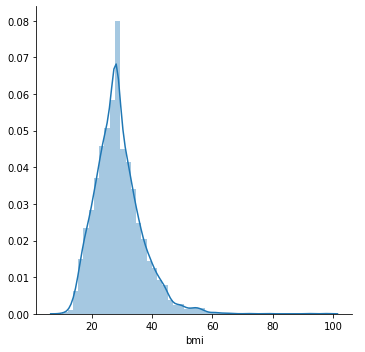

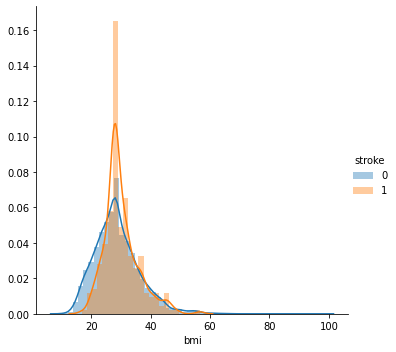

In [9]:
sns.FacetGrid(df, size=5) \
   .map(sns.distplot, "bmi") \
   .add_legend();
sns.FacetGrid(df, hue="stroke", size=5) \
   .map(sns.distplot, "bmi") \
   .add_legend();
plt.show();

the bmi column appears very slightly right skewed.

In [10]:
# Encoding categorical values using Ordinal Encoder from sklearn

ord_enc = OrdinalEncoder()
df["Gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["Ever_married_code"] = ord_enc.fit_transform(df[["ever_married"]])
df["Work_Type_code"] = ord_enc.fit_transform(df[["work_type"]])
df["Residence_type_code"] = ord_enc.fit_transform(df[["Residence_type"]])
df["Smoking_Status_code"] = ord_enc.fit_transform(df[["smoking_status"]])


df.head(11)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Gender_code,Ever_married_code,Work_Type_code,Residence_type_code,Smoking_Status_code
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1.0,1.0,2.0,1.0,1.0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,0.0,1.0,3.0,0.0,2.0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1.0,1.0,2.0,0.0,2.0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0.0,1.0,2.0,1.0,3.0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0.0,1.0,3.0,0.0,2.0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1.0,1.0,2.0,1.0,1.0
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,1.0,1.0,2.0,0.0,2.0
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,0.0,0.0,2.0,1.0,2.0
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1,0.0,1.0,2.0,0.0,0.0
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,0.0,1.0,2.0,1.0,0.0


Now we have dataframe with double the number of columns. Categorical cols have been encoded. We haven't used pd.get_dummies as introducing dummy var creates a very high dimensional sparse dataframe. Decision trees tend to overfit on data with a large number of features. Decision tree would suffer from curse of dimensionality if we introduced dummy vars. Hence we used Ordinal Encoder from sklearn instead.

In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Gender_code', 'Ever_married_code',
       'Work_Type_code', 'Residence_type_code', 'Smoking_Status_code'],
      dtype='object')

In [12]:
df_new = df[['id',
       'Gender_code', 'age', 'hypertension', 'heart_disease',
       'Ever_married_code', 'Work_Type_code', 'Residence_type_code', 'avg_glucose_level',
       'bmi', 'Smoking_Status_code', 'stroke']]

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
id                     5110 non-null int64
Gender_code            5110 non-null float64
age                    5110 non-null float64
hypertension           5110 non-null int64
heart_disease          5110 non-null int64
Ever_married_code      5110 non-null float64
Work_Type_code         5110 non-null float64
Residence_type_code    5110 non-null float64
avg_glucose_level      5110 non-null float64
bmi                    5110 non-null float64
Smoking_Status_code    5110 non-null float64
stroke                 5110 non-null int64
dtypes: float64(8), int64(4)
memory usage: 479.2 KB


In [13]:
# perfectly numeric dataframe
df_new.head()

,id,Gender_code,age,hypertension,heart_disease,Ever_married_code,Work_Type_code,Residence_type_code,avg_glucose_level,bmi,Smoking_Status_code,stroke
0,9046,1.0,67.0,0,1,1.0,2.0,1.0,228.69,36.6,1.0,1
1,51676,0.0,61.0,0,0,1.0,3.0,0.0,202.21,28.1,2.0,1
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
3,60182,0.0,49.0,0,0,1.0,2.0,1.0,171.23,34.4,3.0,1
4,1665,0.0,79.0,1,0,1.0,3.0,0.0,174.12,24.0,2.0,1


### 2. b. Visualize the data in 3-D scatter plot and write the inferences, How the data look like. [5]

3d Scatter plot:

#### Age vs BMI vs Avg Glucose for stroke

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

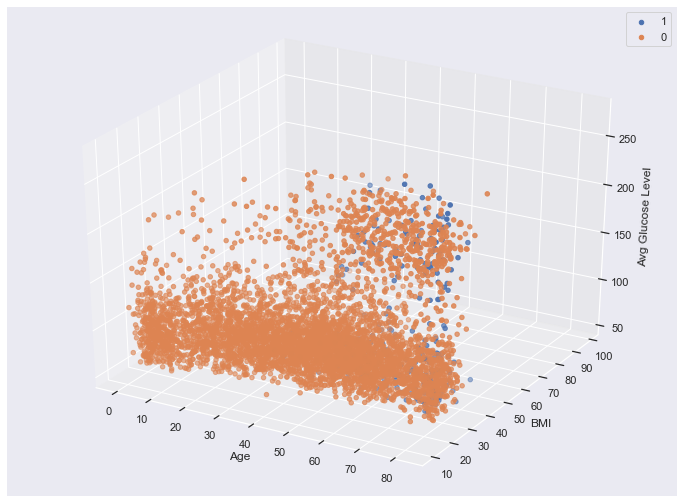

In [14]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = '3d')

x = df_new['age']
y = df_new['bmi']
z = df_new['avg_glucose_level']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Avg Glucose Level")

for s in df_new.stroke.unique():
  ax.scatter(x[df_new.stroke==s],y[df_new.stroke==s],z[df_new.stroke==s],label=s)

#ax.scatter(x, y, z)
ax.legend()
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 200, 10))
plt.show()

#### Inference:
It is evident from the above 3d scatter plot that with rise in BMI index, the average blood glucose level of the individual also goes up & hence those individuals are more vulnerable to strokes.

### 2. c. Make a boxplot for each feature and highlight the outlier, if any, then remove the outlier, again visualize the data in 3-D scatter plot to show the outlier effect and write the inferences. [5]

Now let's find out outliers. Looking at the dataframe we can say only two of the columns, "bmi" & "avg_glucose_level" columns are vulnerable to outliers. Rest of the columns are either categorical values which do not contain any outliers or are numeric columns with discrete entries also without outliers. 

Boxplots for all the columns before outlier removal:

No handles with labels found to put in legend.


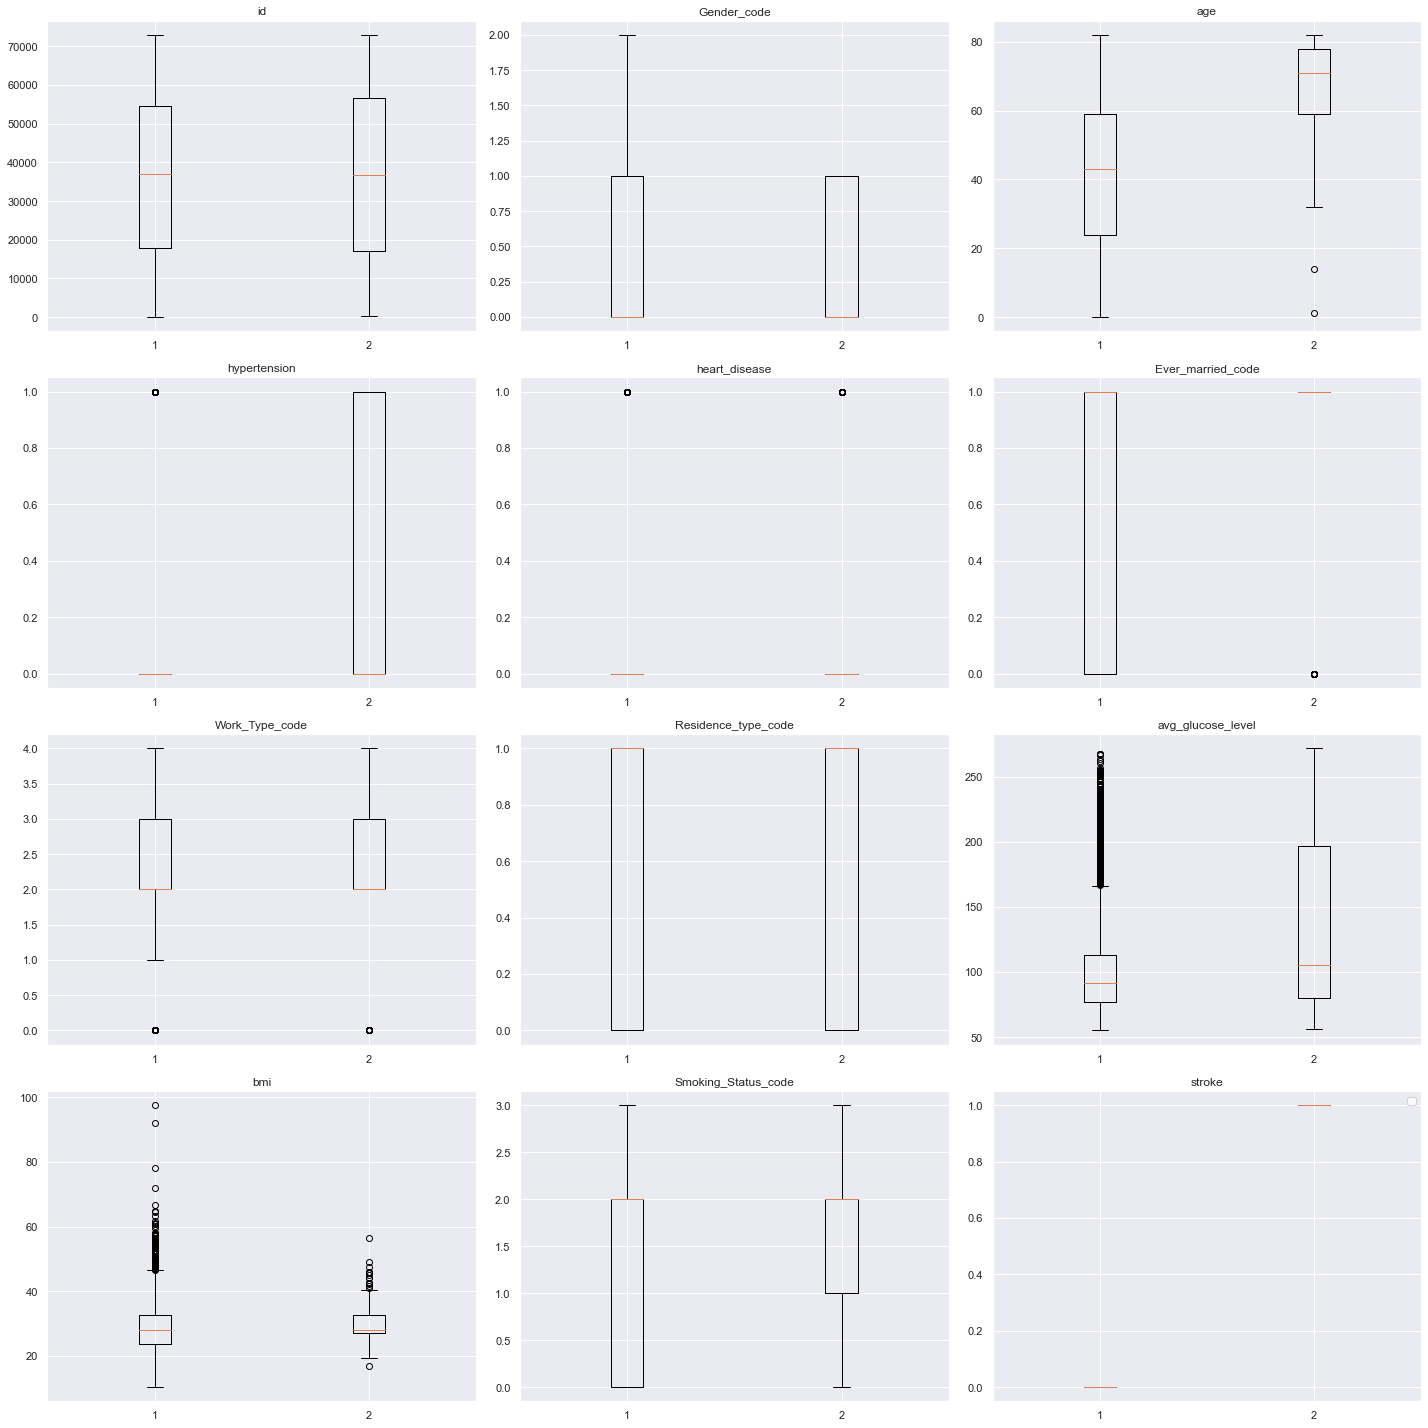

In [15]:
global new_df # declaring it as global so as to be able to 
              #use this var within local scopes of functions in future
new_df = df_new.copy() # Making a copy of the original dataframe for ease

df_0 = new_df[new_df['stroke'] == 0]
df_1 = new_df[new_df['stroke'] == 1]
fig = plt.figure(figsize=(20,20))

#
for i,b in enumerate(list(new_df.columns[0:30])):
    
    i +=1
    ax = fig.add_subplot(4,3,i)
    ax.boxplot([df_0[b], df_1[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

From the box plots we are sure that only two of the mentioned columns contain outliers

No handles with labels found to put in legend.


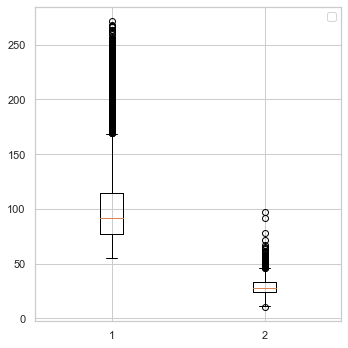

In [16]:
fig = plt.figure(figsize=(5,5))

plt.boxplot([df_new["avg_glucose_level"], df_new["bmi"]])

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

In [17]:
df_new["bmi"].value_counts().sort_index(ascending=False)

97.6    1
92.0    1
78.0    1
71.9    1
66.8    1
       ..
12.3    1
12.0    1
11.5    1
11.3    1
10.3    1
Name: bmi, Length: 418, dtype: int64

Treating Outliers with IQR method:

In [18]:
def remove_outlier(df, col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)

  iqr = q3 - q1
  lower_bound  = q1 - (1.5  * iqr)
  upper_bound = q3 + (1.5 * iqr)

  out_df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]
  return out_df

In [19]:
df1234 = remove_outlier(df_new, "bmi")
df1234.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4984 entries, 0 to 5109
Data columns (total 12 columns):
id                     4984 non-null int64
Gender_code            4984 non-null float64
age                    4984 non-null float64
hypertension           4984 non-null int64
heart_disease          4984 non-null int64
Ever_married_code      4984 non-null float64
Work_Type_code         4984 non-null float64
Residence_type_code    4984 non-null float64
avg_glucose_level      4984 non-null float64
bmi                    4984 non-null float64
Smoking_Status_code    4984 non-null float64
stroke                 4984 non-null int64
dtypes: float64(8), int64(4)
memory usage: 506.2 KB


We removed the rows where the respective bmi feature contained outliers. Now we end up with 4984 rows in total.

In [20]:
df12345 = remove_outlier(df1234, "avg_glucose_level")
df12345.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 2 to 5109
Data columns (total 12 columns):
id                     4390 non-null int64
Gender_code            4390 non-null float64
age                    4390 non-null float64
hypertension           4390 non-null int64
heart_disease          4390 non-null int64
Ever_married_code      4390 non-null float64
Work_Type_code         4390 non-null float64
Residence_type_code    4390 non-null float64
avg_glucose_level      4390 non-null float64
bmi                    4390 non-null float64
Smoking_Status_code    4390 non-null float64
stroke                 4390 non-null int64
dtypes: float64(8), int64(4)
memory usage: 445.9 KB


We removed the rows where the respective avg_glucose_level feature contained outliers. Now we end up with 4390 rows in total.

In [21]:
df12345["bmi"].value_counts().sort_index(ascending=False)

46.2    2
46.1    2
46.0    2
45.9    2
45.8    1
       ..
12.8    1
12.3    1
12.0    1
11.5    1
11.3    1
Name: bmi, Length: 332, dtype: int64

now it ranges within 11.3 & 46.2 unlike previously between 10.3 & 97.6.

Make a box plot post outlier removal:

In [22]:
df_copy = df12345.copy() # making a copy of the dataframe for easier handling

No handles with labels found to put in legend.


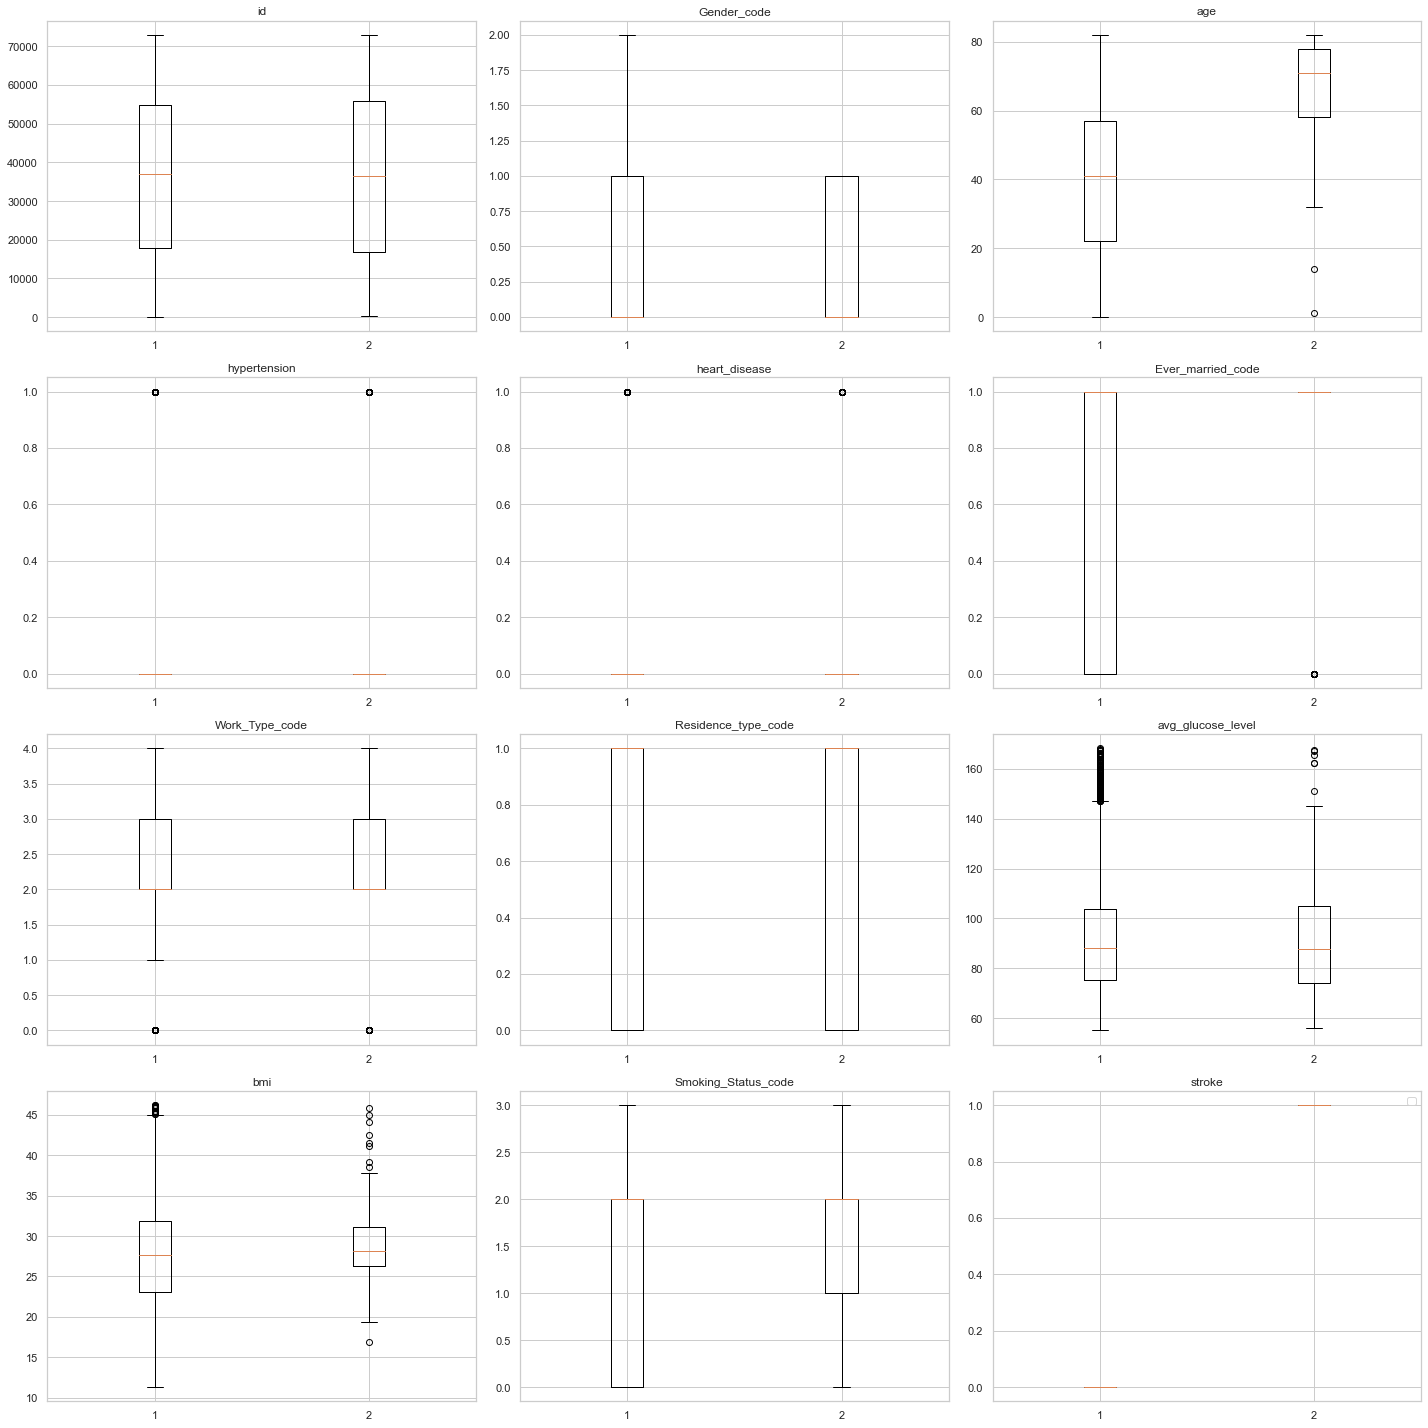

In [23]:


df_0 = df_copy[df_copy['stroke'] == 0]
df_1 = df_copy[df_copy['stroke'] == 1]
fig = plt.figure(figsize=(20,20))

#
for i,b in enumerate(list(df_copy.columns[0:30])):
    
    i +=1
    ax = fig.add_subplot(4,3,i)
    ax.boxplot([df_0[b], df_1[b]])

    ax.set_title(b)

sns.set_style("whitegrid")
plt.tight_layout()
plt.legend()
plt.show()

Clearly the bmi & avg glucose level columns (and the rest of the columns as well) are now free from outliers.

### make 3d scatter plot after outlier removal:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

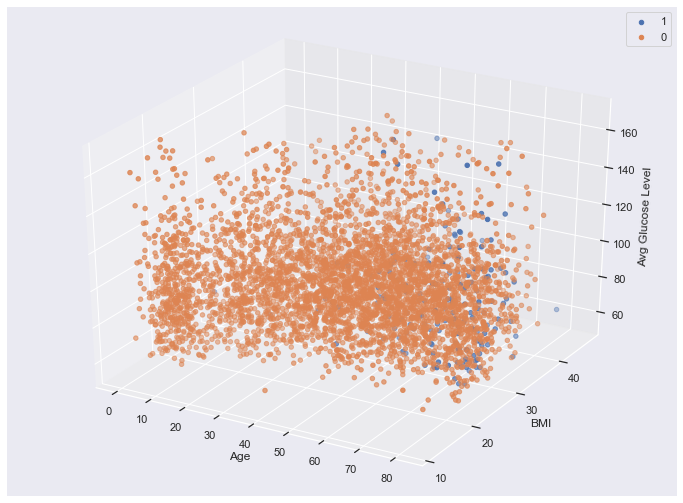

In [24]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection = '3d')

x = df12345['age']
y = df12345['bmi']
z = df12345['avg_glucose_level']

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Avg Glucose Level")

for s in df12345.stroke.unique():
  ax.scatter(x[df12345.stroke==s],y[df12345.stroke==s],z[df12345.stroke==s],label=s)

#ax.scatter(x, y, z)
ax.legend()
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 200, 10))
plt.show()

#### Inference:
We performed the outlier removal as asked using the Inter Quartile Range method. 
We also plotted 3D scatter plots before & after outlier removal as shown above.
Both the plots appear significantly different. However it is still not very obvious to separate the dots purely based on the three features. We will apply clustering & classification algorithms to understand the pattern.

### 2. d. Normalized the data if required, and write a note for what, why and how you performed normalization.[5]

#### Reason for normalization & Significance:
Here comes the need for normalization. All the columns are not at a common comparable range. This makes the analysis difficult. Moreover the machine learning akgorithms we are about to implement ahead work better with normalized data. Hence we are applying MinMaxScaler method to normalize the dataframe.

In [25]:
df12345.head()

,id,Gender_code,age,hypertension,heart_disease,Ever_married_code,Work_Type_code,Residence_type_code,avg_glucose_level,bmi,Smoking_Status_code,stroke
2,31112,1.0,80.0,0,1,1.0,2.0,0.0,105.92,32.5,2.0,1
6,53882,1.0,74.0,1,1,1.0,2.0,0.0,70.09,27.4,2.0,1
7,10434,0.0,69.0,0,0,0.0,2.0,1.0,94.39,22.8,2.0,1
8,27419,0.0,59.0,0,0,1.0,2.0,0.0,76.15,28.1,0.0,1
9,60491,0.0,78.0,0,0,1.0,2.0,1.0,58.57,24.2,0.0,1


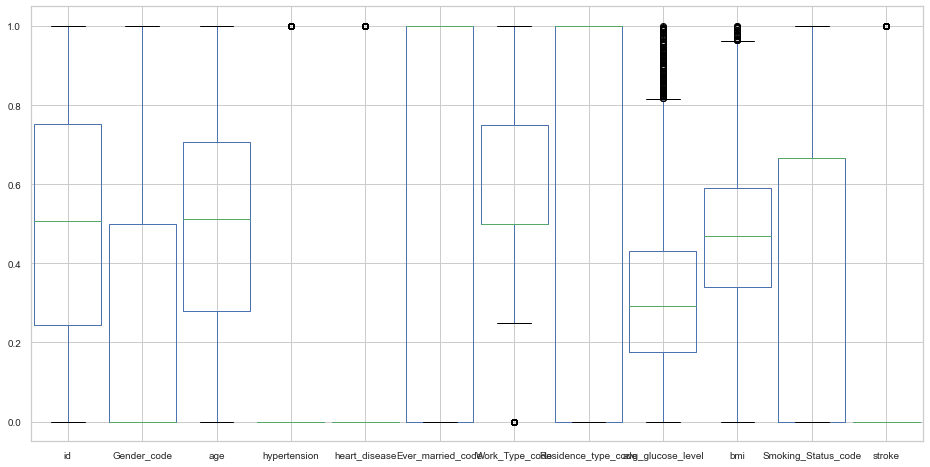

In [26]:
# Using MinMaxScaler to perform normalization
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df_copy) 
df_copy.loc[:,:] = scaled_values

sns.set(rc={'figure.figsize':(16,8)}, font_scale=0.9, style='whitegrid')
df_copy.boxplot(widths = 0.9)

### 2. e. Balance the data if required; you may increase the sample using upsampling if needed.[5]

Check if your dataset is balanced.

In [27]:
df12345["stroke"].value_counts()

0    4225
1     165
Name: stroke, dtype: int64

looks like we have got a very imbalanced dataset with only about 4% who got stroke and the rest 96% who didn't. <br><br>
We need to upsample the data so that we can make it balanced. The reason is, if we don't, with a very bad model which predicts not a stroke 100% of the time irrespective of the input data, we will still get a 96% accuracy which is quite high & clearly misleading.

In [28]:
from sklearn.utils import resample

In [29]:
df_minority = df12345[df12345['stroke']==1]
df_majority = df12345[df12345['stroke']==0]

In [30]:
min_class = resample(df_minority, 
                             replace=True,     
                             n_samples=4225,    
                             random_state=10) 
df_upsampled = pd.concat([min_class,df_majority])

<IPython.core.display.Javascript object>

In [31]:
df_upsampled["stroke"].value_counts()

1    4225
0    4225
Name: stroke, dtype: int64

In [32]:
df_upsampled.head(2)

,id,Gender_code,age,hypertension,heart_disease,Ever_married_code,Work_Type_code,Residence_type_code,avg_glucose_level,bmi,Smoking_Status_code,stroke
18,27458,0.0,60.0,0,0,0.0,2.0,1.0,89.22,37.8,2.0,1
188,30184,1.0,82.0,0,0,1.0,2.0,0.0,86.62,29.5,1.0,1


Imbalance issue has been dealt wth. 

### Train Test Split : 

Now that we have a clean dataframe devoid of any outliers or missing values, we can go ahead an perform train test split as we mentioned earlier.

In [33]:
list34 = list(df_upsampled.columns)
list34.remove('stroke')
x = df_upsampled[list34]
y = df_upsampled[["stroke"]]

X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.3,random_state=42)

### 2. f. Perform at least three clustering methods with varying cluster sizes. Perform any three best-known methods to find out correct cluster numbers for each method; how you finalized this cluster number.[10]

#### Clustering Methos 1:

#### K Means Clustering :
We will perform KMeans clustering at first. We will use the elbow method to find the elbow value, i.e. the optimum value of K for which we get the best clustering.<br>We are using varying cluster sizes as asked in the question.

In [34]:
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(X_train)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_train, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

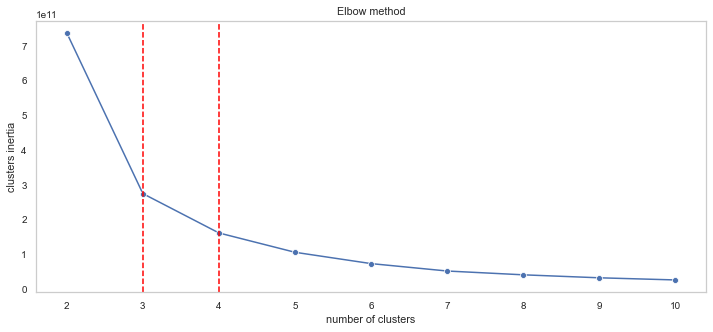

In [35]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

From this plot we observe that "elbow" has to be 3. Though a choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score to be sure of the elbow point.

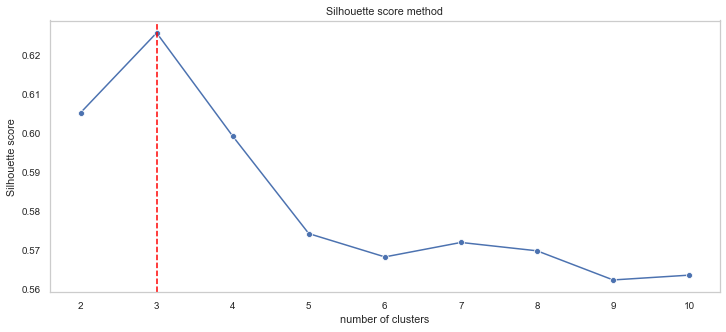

In [36]:
# Plot for Silhouette score to find the optimum K

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

Now we can say the best option would be 3. Hence we will go with K=3

#### K Means Clustering with Cluster size = 3 :

In [37]:
# To initialize and fit K-Means model
KM_3_clusters = KMeans(n_clusters=3 , init='k-means++').fit(X_train)
KM_3_clusters.labels_

array([1, 1, 0, ..., 2, 2, 0])

In [38]:
KM_3_clusters.cluster_centers_

array([[3.58650739e+04, 3.95359848e-01, 5.37974242e+01, 1.58143939e-01,
        7.52840909e-02, 7.54734848e-01, 2.23295455e+00, 4.60227273e-01,
        9.35982907e+01, 2.85750000e+01, 1.38683712e+00],
       [6.14911473e+04, 3.80597015e-01, 5.27796219e+01, 1.55721393e-01,
        8.35820896e-02, 7.37313433e-01, 2.03930348e+00, 5.41293532e-01,
        9.08747413e+01, 2.83454229e+01, 1.41940299e+00],
       [1.02983714e+04, 4.62353597e-01, 5.36503067e+01, 1.56162856e-01,
        8.97936419e-02, 7.19464584e-01, 2.11154490e+00, 5.66648076e-01,
        9.03112437e+01, 2.75726157e+01, 1.41996654e+00]])

In [39]:
KM_3_clusters.predict(X_test)

array([1, 0, 1, ..., 0, 1, 1])

#### Clustering Methos 2:

#### MiniBatchKMeans Clustering:
We are applying MiniBatchKMeans Clustering algorithm here.

In [40]:

n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores


from sklearn.cluster import MiniBatchKMeans
for n in n_clusters:
    KM_est = MiniBatchKMeans(n_clusters=n, init='k-means++').fit(X_train)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(X_train, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

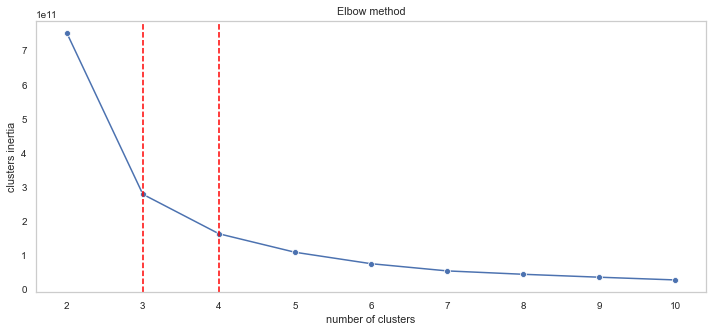

In [41]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, clusters_inertia, marker='o', ax=ax)
ax.set_title("Elbow method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("clusters inertia")
ax.axvline(3, ls="--", c="red")
ax.axvline(4, ls="--", c="red")
plt.grid()
plt.show()

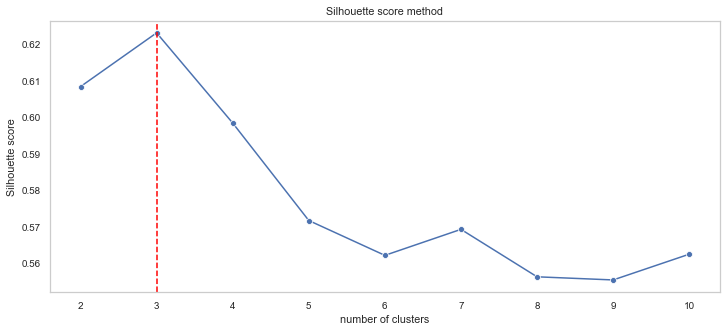

In [42]:
# Plot for Silhouette score to find the optimum K

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

In [43]:
# To initialize and fit Mini batch K-Means model
MKM_3_clusters = MiniBatchKMeans(n_clusters=3 , init='k-means++').fit(X_train)

MKM_3_clusters.labels_

array([2, 2, 0, ..., 1, 1, 0])

In [44]:
MKM_3_clusters.cluster_centers_

array([[3.58771902e+04, 4.23529412e-01, 5.45140392e+01, 1.41176471e-01,
        7.84313725e-02, 7.56862745e-01, 2.30000000e+00, 4.70588235e-01,
        9.40758431e+01, 2.86143137e+01, 1.29803922e+00],
       [1.03391635e+04, 4.71153846e-01, 5.36900962e+01, 1.49038462e-01,
        1.00961538e-01, 6.87500000e-01, 2.14903846e+00, 5.50480769e-01,
        9.06136058e+01, 2.75752404e+01, 1.37980769e+00],
       [6.11684705e+04, 3.94514768e-01, 5.34030380e+01, 1.54008439e-01,
        7.80590717e-02, 7.34177215e-01, 2.09915612e+00, 5.06329114e-01,
        9.06135654e+01, 2.81238397e+01, 1.47890295e+00]])

In [45]:
MKM_3_clusters.predict(X_test)

array([2, 0, 2, ..., 0, 2, 2])

#### Clustering Methos 3:

#### Agglomerative Clustering:
We are applying Agglomerative Clustering algorithm here.

In [46]:
# Importing AgglomerativeClustering from Sklearn
from sklearn.cluster import AgglomerativeClustering

# Running Agglomerative Clustering
no_of_clusters = []
n_clusters = range(2, 10) # Range is arbitrarily chosen
ag_sil_score = [] # silouette scores

for p in n_clusters:
    AG = AgglomerativeClustering(n_clusters=p).fit(X_train)
    no_of_clusters.append((len(np.unique(AG.labels_))))
    ag_sil_score.append(silhouette_score(X_train, AG.labels_))
    
results = pd.DataFrame([n_clusters, no_of_clusters, ag_sil_score], index=['n_clusters','clusters', 'sil_score']).T
results.sort_values(by='sil_score', ascending=False).head() # display only 5 best scores

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,n_clusters,clusters,sil_score
1,3.0,3.0,0.606391
0,2.0,2.0,0.599577
2,4.0,4.0,0.582559
4,6.0,6.0,0.559554
5,7.0,7.0,0.557545


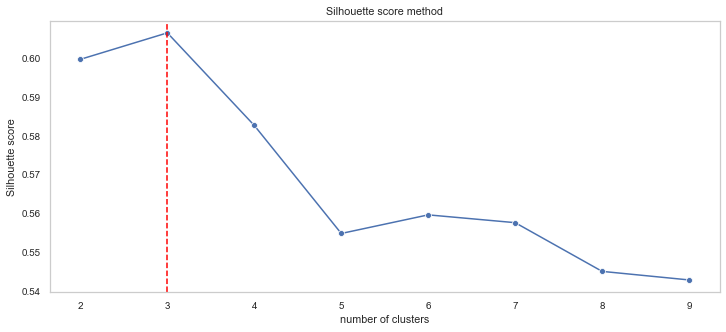

In [47]:
# For plotting silhoette score

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, ag_sil_score, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

From the silhouette score model we observe that 3 is optimum cluster number.

#### Agglomerative Clustering with Cluster size = 3 :

In [48]:
# To initialize and fit agglomerative model
AG = AgglomerativeClustering(n_clusters=3).fit(X_train)
AG.labels_

array([0, 0, 0, ..., 1, 1, 2], dtype=int64)

In [49]:
AG.n_leaves_ # Shows Number of leaves in the hierarchical tree.

5915

### 2. g. Perform at least three supervised methods for classification, and report at least three performance metrics out of (accuracy, precision, Cohen's kappa, F1-score, MCC, sensitivity and specificity) with proper reason. [10]

#### Classification method 1:

#### Naive bayes classification:

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

y_pred  =  classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
ac = accuracy_score(Y_test,y_pred)

print("Accuracy:",ac)
print("Precision:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy: 0.7388560157790927


NameError: name 'metrics' is not defined

#### Classification method 2:

#### Logistic Regression:

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, Y_train)
Y_Pred2 = model.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_Pred2)
cnf_matrix

array([[ 945,  320],
       [ 226, 1044]], dtype=int64)

In [52]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_Pred2))
print("Precision:",metrics.precision_score(Y_test, Y_Pred2))
print("Recall:",metrics.recall_score(Y_test, Y_Pred2))

Accuracy: 0.7846153846153846
Precision: 0.7653958944281525
Recall: 0.8220472440944881


#### Classification method 3:

#### K-Nearest neighbour:

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

y_pred2 = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(Y_test, y_pred2)
ac1 = accuracy_score(Y_test,y_pred2)

print("Accuracy:",ac1)
print("Precision:",metrics.precision_score(Y_test, y_pred2))
print("Recall:",metrics.recall_score(Y_test, y_pred2))

Accuracy: 0.9404339250493097
Precision: 0.8937368050668544
Recall: 1.0


In [ ]:
ml_names = ['Gaussian Naive Bayes', 'Logistic Regression', 'Decision Tree']

acc_all = [acc_gnb, acc_logit, acc_dtree]
prec_all = [prec_gnb, prec_logit, prec_dtree]
f1_all = [f1_gnb, f1_logit, f1_dtree]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, acc_all, width, label='Accuracy')
bar2 = ax.bar(r2, prec_all, width, label='Precision')
bar3 = ax.bar(r3, f1_all, width, label='F1')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)

#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()    